In [634]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics, preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [635]:
data = pd.read_csv("madfhantr.csv")

In [636]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [637]:
data.shape

(614, 13)

In [638]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [639]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [640]:
numerical_cols = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']

In [641]:
numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

In [642]:
data[numerical_cols] = numerical_imputer.fit_transform(data[numerical_cols])
data[categorical_cols] = categorical_imputer.fit_transform(data[categorical_cols])

In [643]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [657]:
X = data.drop(['Loan_ID', 'Loan_Status'], axis=1)
Y = data['Loan_Status']
Y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [655]:
X=pd.get_dummies(X)
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
1,4583,1508.0,128.000000,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,True,False,False
2,3000,0.0,66.000000,360.0,1.0,False,True,False,True,True,False,False,False,True,False,False,True,False,False,True
3,2583,2358.0,120.000000,360.0,1.0,False,True,False,True,True,False,False,False,False,True,True,False,False,False,True
4,6000,0.0,141.000000,360.0,1.0,False,True,True,False,True,False,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,True,False,True,False,True,False,False,False,True,False,True,False,True,False,False
610,4106,0.0,40.000000,180.0,1.0,False,True,False,True,False,False,False,True,True,False,True,False,True,False,False
611,8072,240.0,253.000000,360.0,1.0,False,True,False,True,False,True,False,False,True,False,True,False,False,False,True
612,7583,0.0,187.000000,360.0,1.0,False,True,False,True,False,False,True,False,True,False,True,False,False,False,True


In [646]:
label_encoder = preprocessing.LabelEncoder()
y_encoded = label_encoder.fit_transform(Y)

In [647]:
x_train, x_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.20,random_state=10)

In [648]:
clf = DecisionTreeClassifier()

In [649]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [650]:
y_pred = clf.predict(x_test)

In [651]:
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

In [652]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Accuracy: 0.7479674796747967
Precision: 0.8043478260869565
Recall: 0.8505747126436781
F1 Score: 0.8268156424581005


In [653]:
cm = confusion_matrix(y_test,y_pred)
print("Confusion matrix:-")
print(cm)

Confusion matrix:-
[[18 18]
 [13 74]]


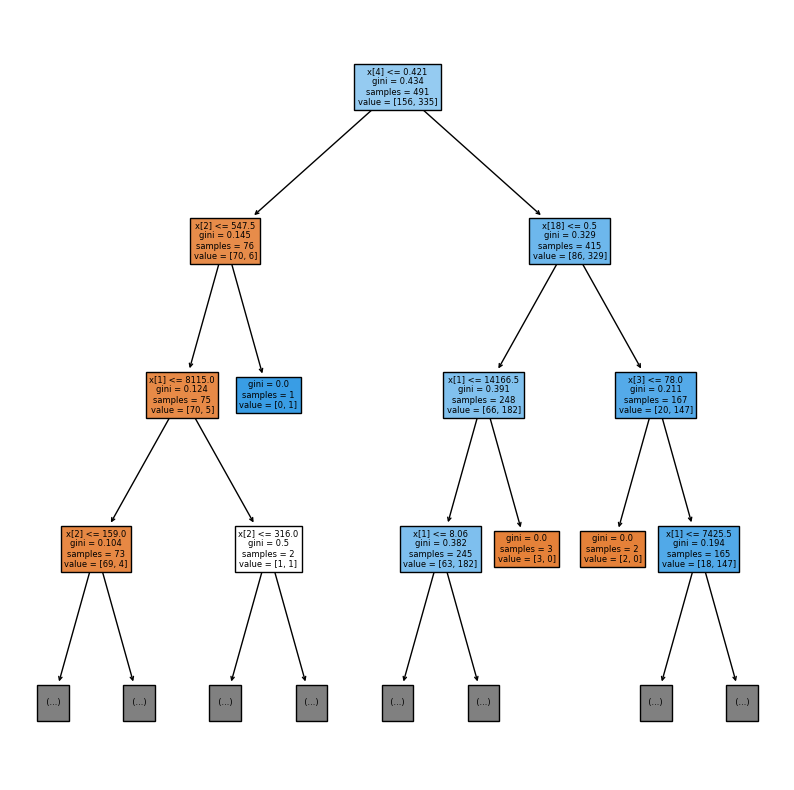

In [659]:
plt.figure(figsize=(10,10))
plot_tree(clf,filled=True,max_depth=3)
plt.show()